In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
import scipy.stats
import matplotlib

import warnings
warnings.filterwarnings('ignore')

In [50]:
data = pd.read_csv("Oscar Screener Piracy 2003-2015 - Raw Data.csv", header=0, index_col=0, skiprows=1)
print(data.describe())
print(data.info())
print(data.shape)
#data=data.fillna("01/01/1990")
data

        Oscar Year  US Release to First Leak  US Release to Screener Leak  \
count   413.000000                409.000000                   252.000000   
mean   2009.200969                 28.051345                    44.269841   
std       3.716377                 59.699327                    47.020198   
min    2003.000000               -211.000000                  -211.000000   
25%    2006.000000                  1.000000                    16.000000   
50%    2009.000000                 10.000000                    41.000000   
75%    2012.000000                 43.000000                    68.250000   
max    2015.000000                482.000000                   245.000000   

       Screener Release to Screener Leak  US Release to DVD/Blu-Ray Leak  
count                         236.000000                      389.000000  
mean                           -6.470339                      104.408740  
std                            66.536210                       69.758715  
min   

,Oscar Year,US Release Date,Oscar Screener Release,Cam Leak,Telesync Leak,HQ Rip Leak (Telecine/R5/PPV/Webrip/WebDL/HDRip),Screener Leak,Retail Leak (DVD/Blu-Ray),US Release to First Leak,US Release to Screener Leak,Screener Release to Screener Leak,Ceremony Date,Screener Leaked by Oscar Night?,Screener/Retail DVD Leaked by Oscar Night?,High-Quality Leak by Oscar Night?,US Release to DVD/Blu-Ray Leak
Title,,,,,,,,,,,,,,,,
American Sniper,2015,12/25/2014,12/2/2014,NaN,NaN,NaN,1/7/2015,NaN,13.0,13.0,36.0,2/22/2015,Yes,Yes,Yes,NaN
Begin Again,2015,6/27/2014,NaN,NaN,NaN,8/30/2014,NaN,10/7/2014,64.0,NaN,NaN,2/22/2015,No,Yes,Yes,102.0
Beyond the Lights,2015,11/14/2014,NaN,12/22/2014,NaN,NaN,NaN,NaN,38.0,NaN,NaN,2/22/2015,No,No,No,NaN
Big Hero 6,2015,11/7/2014,11/21/2014,11/15/2014,NaN,NaN,1/7/2015,NaN,8.0,61.0,47.0,2/22/2015,Yes,Yes,Yes,NaN
Birdman,2015,10/17/2014,12/17/2014,NaN,NaN,NaN,1/7/2015,NaN,82.0,82.0,21.0,2/22/2015,Yes,Yes,Yes,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
The Time Machine,2003,3/8/2002,NaN,NaN,3/8/2002,NaN,5/15/2002,NaN,0.0,68.0,NaN,3/23/2003,Yes,Yes,Yes,NaN
The Wild Thornberrys Movie,2003,12/20/2002,12/28/2002,12/21/2002,12/24/2002,NaN,1/5/2003,3/18/2003,1.0,16.0,8.0,3/23/2003,Yes,Yes,Yes,88.0
Treasure Planet,2003,11/27/2002,2/19/2003,11/29/2002,12/10/2002,NaN,1/13/2003,3/18/2003,2.0,47.0,-37.0,3/23/2003,Yes,Yes,Yes,111.0


In [51]:
data=data.replace(to_replace=['Yes', 'No'], value=[1,0])
data=data.convert_dtypes()
for i in [1,2,3,4,5,6,7,11]:
    data.iloc[:, i] = pd.to_datetime(data.iloc[:, i])
print(data.info())
data

<class 'pandas.core.frame.DataFrame'>
Index: 413 entries, American Sniper to Y tu Mama Tambien
Data columns (total 16 columns):
 #   Column                                            Non-Null Count  Dtype         
---  ------                                            --------------  -----         
 0   Oscar Year                                        413 non-null    Int64         
 1   US Release Date                                   413 non-null    datetime64[ns]
 2   Oscar Screener Release                            362 non-null    datetime64[ns]
 3   Cam Leak                                          152 non-null    datetime64[ns]
 4   Telesync Leak                                     144 non-null    datetime64[ns]
 5   HQ Rip Leak (Telecine/R5/PPV/Webrip/WebDL/HDRip)  90 non-null     datetime64[ns]
 6   Screener Leak                                     250 non-null    datetime64[ns]
 7   Retail Leak (DVD/Blu-Ray)                         389 non-null    datetime64[ns]
 8   US Rele

,Oscar Year,US Release Date,Oscar Screener Release,Cam Leak,Telesync Leak,HQ Rip Leak (Telecine/R5/PPV/Webrip/WebDL/HDRip),Screener Leak,Retail Leak (DVD/Blu-Ray),US Release to First Leak,US Release to Screener Leak,Screener Release to Screener Leak,Ceremony Date,Screener Leaked by Oscar Night?,Screener/Retail DVD Leaked by Oscar Night?,High-Quality Leak by Oscar Night?,US Release to DVD/Blu-Ray Leak
Title,,,,,,,,,,,,,,,,
American Sniper,2015,2014-12-25,2014-12-02,NaT,NaT,NaT,2015-01-07,NaT,13,13,36,2015-02-22,1,1,1,<NA>
Begin Again,2015,2014-06-27,NaT,NaT,NaT,2014-08-30,NaT,2014-10-07,64,<NA>,<NA>,2015-02-22,0,1,1,102
Beyond the Lights,2015,2014-11-14,NaT,2014-12-22,NaT,NaT,NaT,NaT,38,<NA>,<NA>,2015-02-22,0,0,0,<NA>
Big Hero 6,2015,2014-11-07,2014-11-21,2014-11-15,NaT,NaT,2015-01-07,NaT,8,61,47,2015-02-22,1,1,1,<NA>
Birdman,2015,2014-10-17,2014-12-17,NaT,NaT,NaT,2015-01-07,NaT,82,82,21,2015-02-22,1,1,1,<NA>
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
The Time Machine,2003,2002-03-08,NaT,NaT,2002-03-08,NaT,2002-05-15,NaT,0,68,<NA>,2003-03-23,1,1,1,<NA>
The Wild Thornberrys Movie,2003,2002-12-20,2002-12-28,2002-12-21,2002-12-24,NaT,2003-01-05,2003-03-18,1,16,8,2003-03-23,1,1,1,88
Treasure Planet,2003,2002-11-27,2003-02-19,2002-11-29,2002-12-10,NaT,2003-01-13,2003-03-18,2,47,-37,2003-03-23,1,1,1,111


In [77]:
def EDA(i, bins=10):
    print("====================================")
    print(f'======= Analyzing feature "{data.columns[i]}" =======')
    print("====================================")
    
    x = data.iloc[:, i]
    print(x.describe())
    
    if x.dtype == 'datetime64[ns]':
        for p in ['D', 'M', 'Y']:
            plt.figure(figsize=(12, 5))
            tmp = pd.Series([1]*len(x), index=x)
            tmp = tmp.resample(p).sum()
            ax = tmp.plot()
            ax.set_ylim(bottom=0)
            plt.title("Daily distribution" if p=='D' else "Monthly distribution" if p=='M' else 'Annual distribution')
            plt.show()
        
    else:
        _x = x.dropna()
        plt.boxplot(_x)
        plt.title("Boxplot of values")
        plt.show()

        plt.figure(figsize=(12, 5))
        hist = plt.hist(_x, density=True, bins=bins)
        plt.title("Histogram of values distribution")
        plt.show()

======= Analyzing feature "Oscar Year" =======
count     413.000000
mean     2009.200969
std         3.716377
min      2003.000000
25%      2006.000000
50%      2009.000000
75%      2012.000000
max      2015.000000
Name: Oscar Year, dtype: float64


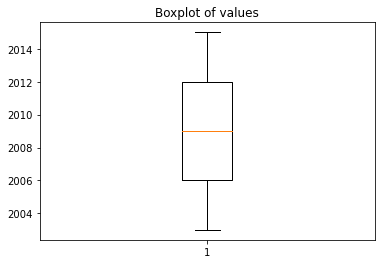

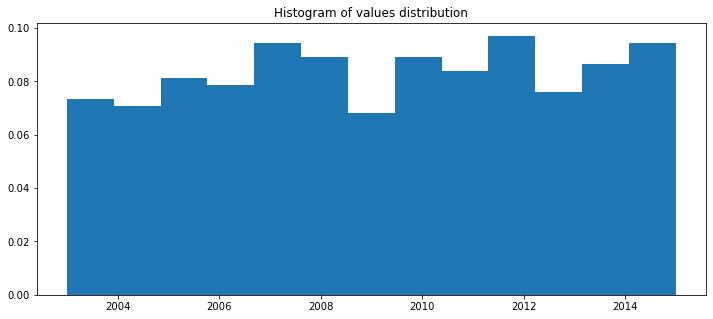

In [78]:
EDA(0, 13)

======= Analyzing feature "US Release Date" =======
count                     413
unique                    329
top       2010-12-29 00:00:00
freq                        4
first     2002-03-08 00:00:00
last      2014-12-25 00:00:00
Name: US Release Date, dtype: object


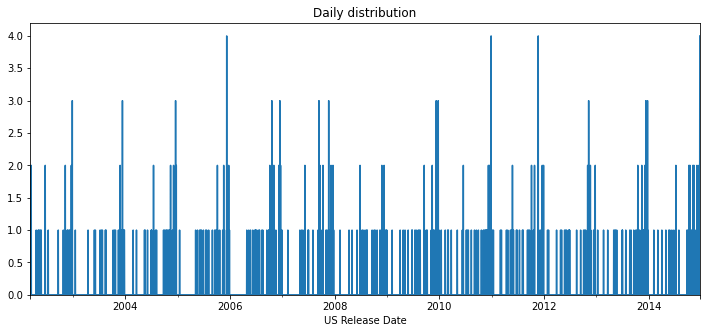

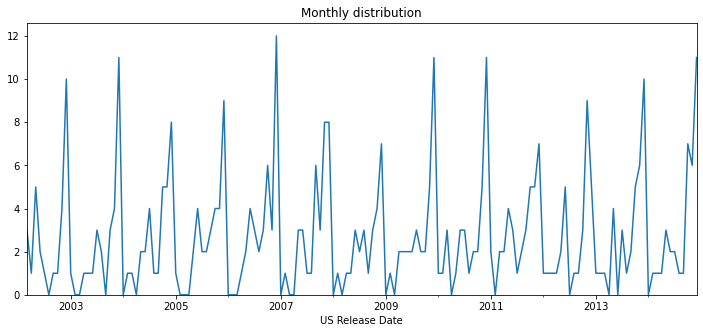

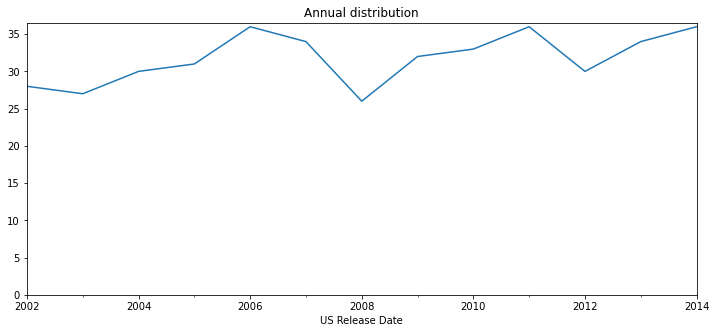

In [65]:
EDA(1)

======= Analyzing feature "Oscar Screener Release" =======
count                     362
unique                    239
top       2005-11-25 00:00:00
freq                        6
first     2002-11-05 00:00:00
last      2014-12-30 00:00:00
Name: Oscar Screener Release, dtype: object


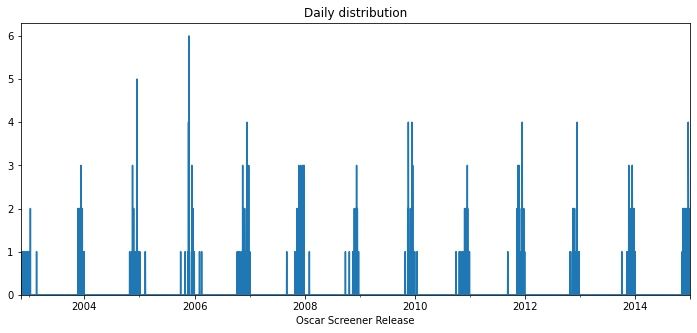

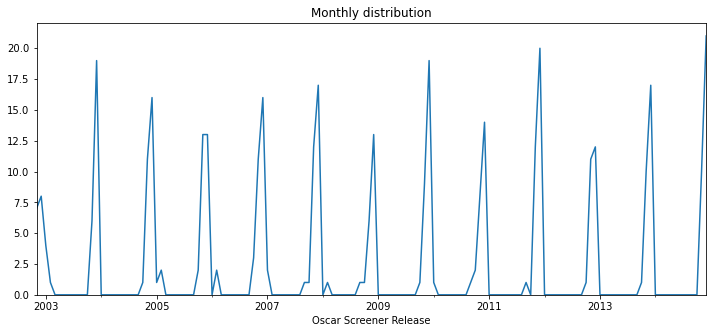

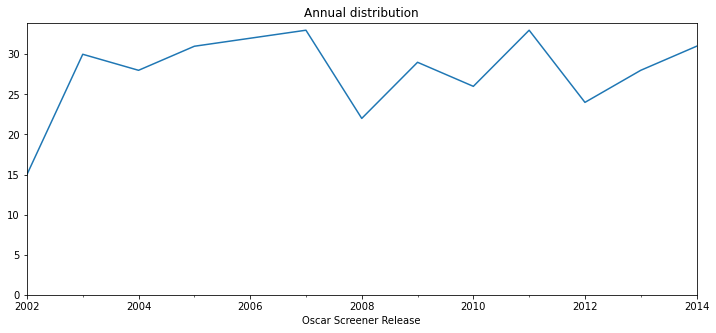

In [66]:
EDA(2)

======= Analyzing feature "Cam Leak" =======
count                     152
unique                    150
top       2007-10-16 00:00:00
freq                        2
first     2002-03-13 00:00:00
last      2014-12-22 00:00:00
Name: Cam Leak, dtype: object


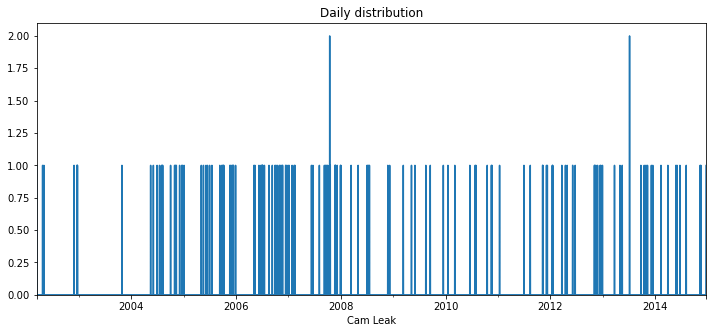

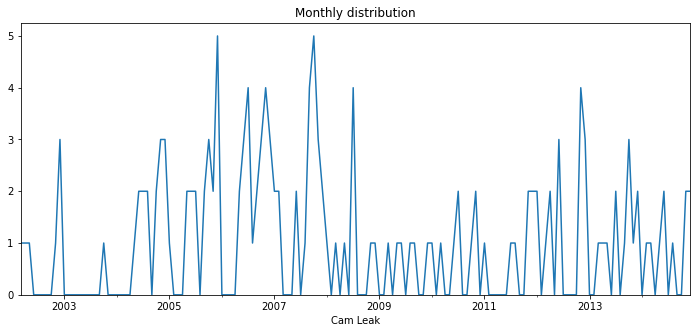

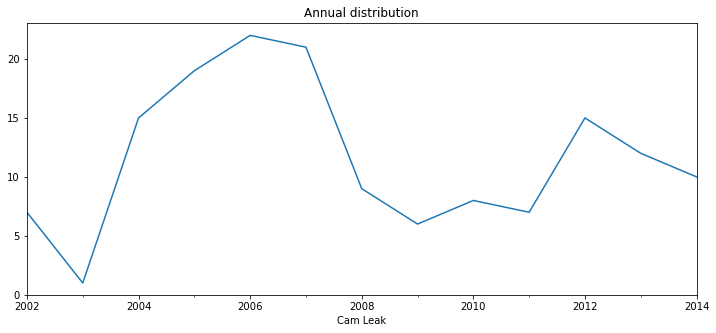

In [67]:
EDA(3)

======= Analyzing feature "Telesync Leak" =======
count                     144
unique                    140
top       2002-05-14 00:00:00
freq                        2
first     2002-03-08 00:00:00
last      2015-01-01 00:00:00
Name: Telesync Leak, dtype: object


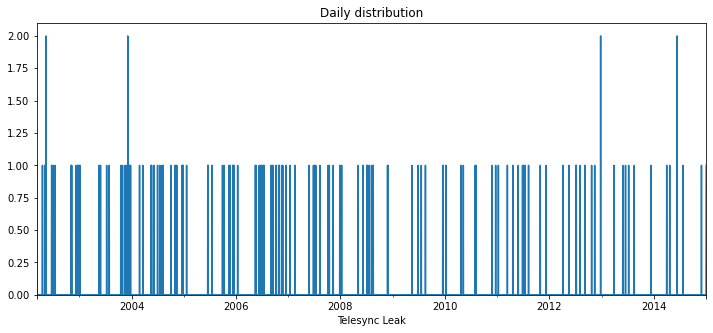

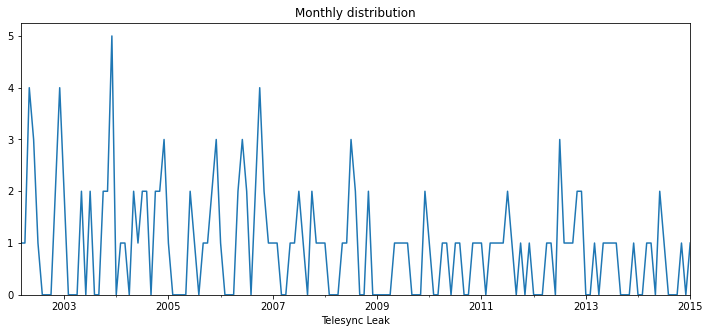

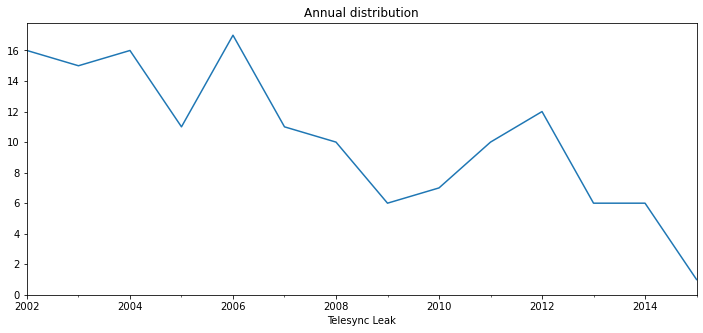

In [68]:
EDA(4)

======= Analyzing feature "HQ Rip Leak (Telecine/R5/PPV/Webrip/WebDL/HDRip)" =======
count                      90
unique                     88
top       2014-11-21 00:00:00
freq                        2
first     2002-06-23 00:00:00
last      2015-01-05 00:00:00
Name: HQ Rip Leak (Telecine/R5/PPV/Webrip/WebDL/HDRip), dtype: object


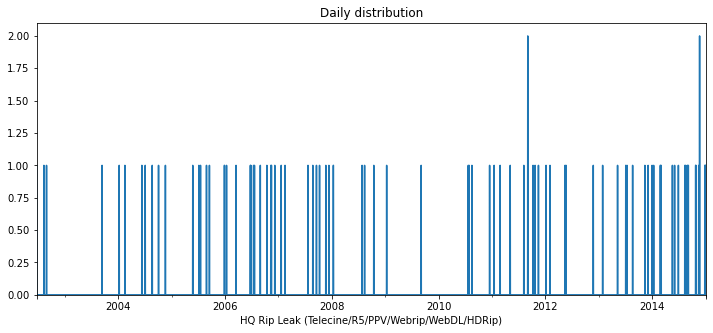

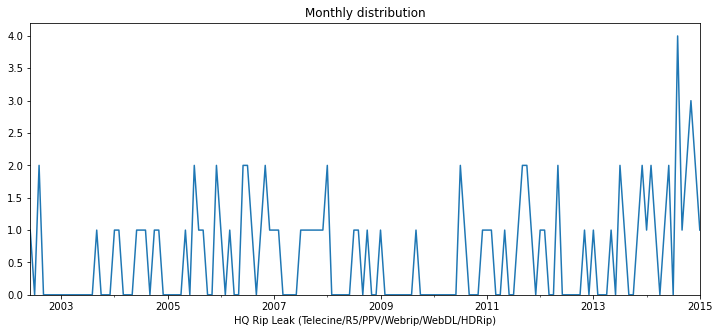

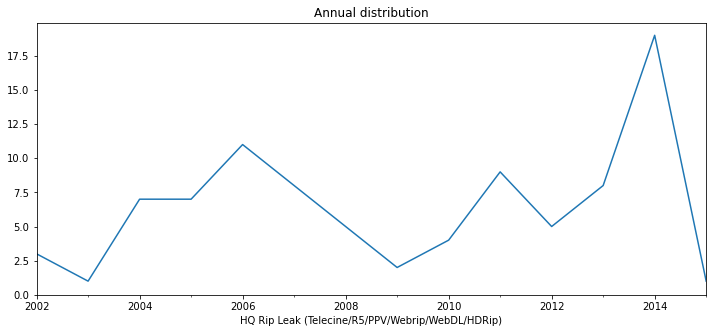

In [69]:
EDA(5)

======= Analyzing feature "Screener Leak" =======
count                     250
unique                    219
top       2015-01-07 00:00:00
freq                        8
first     2002-05-09 00:00:00
last      2015-01-22 00:00:00
Name: Screener Leak, dtype: object


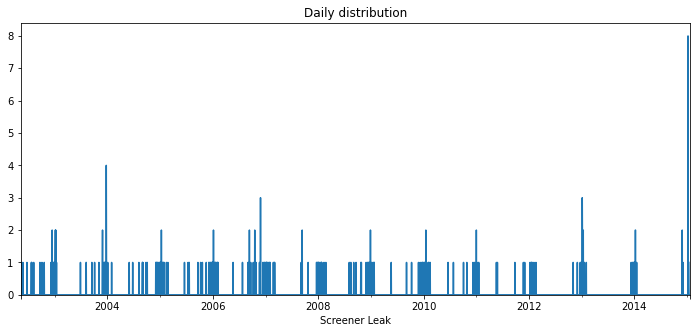

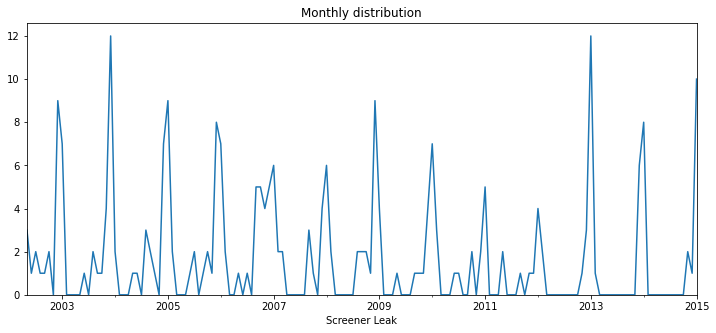

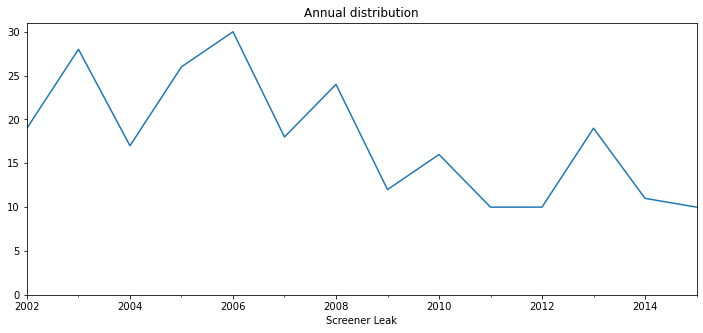

In [70]:
EDA(6)

======= Analyzing feature "Retail Leak (DVD/Blu-Ray)" =======
count                     389
unique                    366
top       2014-02-27 00:00:00
freq                        4
first     2002-07-21 00:00:00
last      2015-01-14 00:00:00
Name: Retail Leak (DVD/Blu-Ray), dtype: object


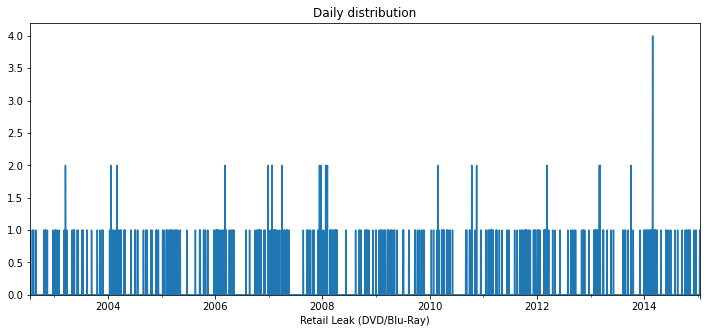

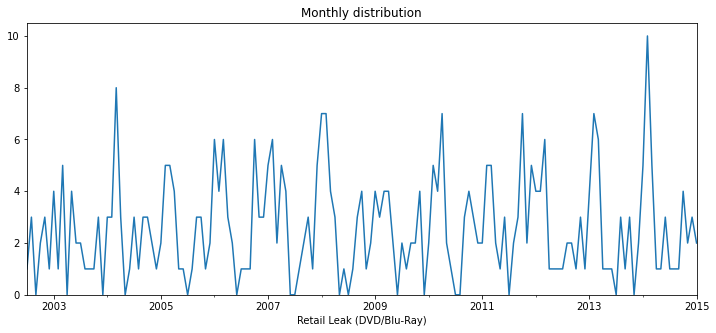

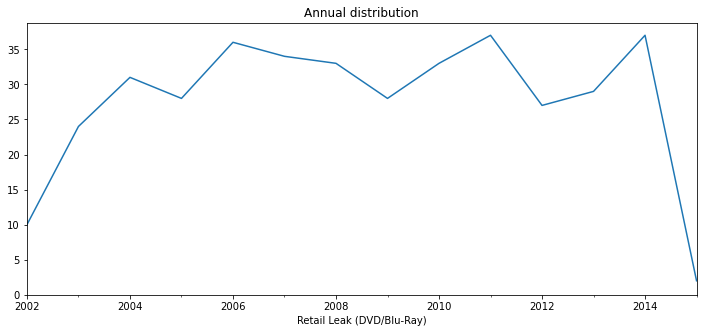

In [71]:
EDA(7)

======= Analyzing feature "US Release to First Leak" =======
count    409.000000
mean      28.051345
std       59.699327
min     -211.000000
25%        1.000000
50%       10.000000
75%       43.000000
max      482.000000
Name: US Release to First Leak, dtype: float64


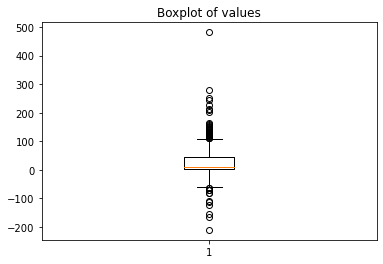

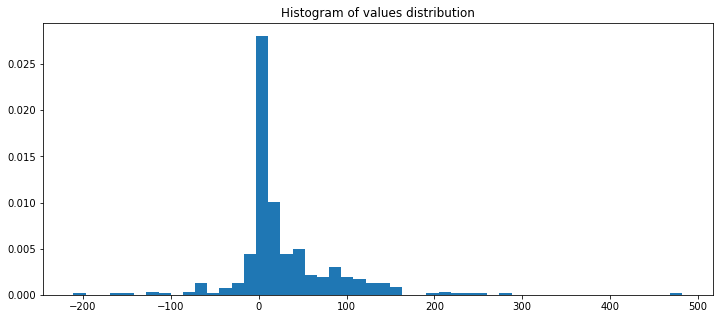

In [81]:
EDA(8, 50)

======= Analyzing feature "US Release to Screener Leak" =======
count    252.000000
mean      44.269841
std       47.020198
min     -211.000000
25%       16.000000
50%       41.000000
75%       68.250000
max      245.000000
Name: US Release to Screener Leak, dtype: float64


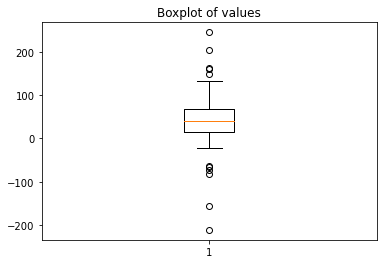

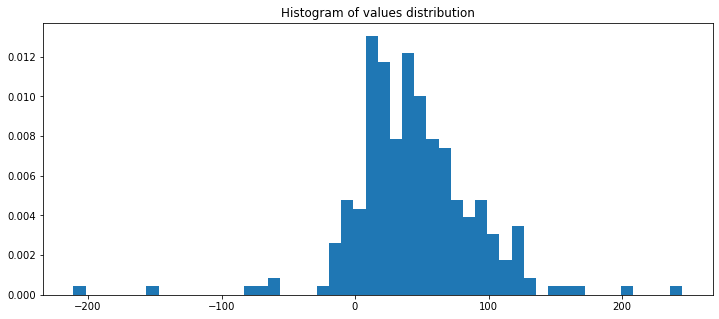

In [83]:
EDA(9, 50)

======= Analyzing feature "Screener Release to Screener Leak" =======
count    236.000000
mean      -6.470339
std       66.536210
min     -330.000000
25%      -11.250000
50%       12.000000
75%       28.000000
max      164.000000
Name: Screener Release to Screener Leak, dtype: float64


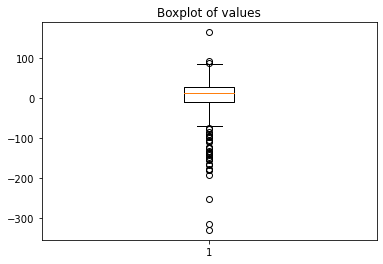

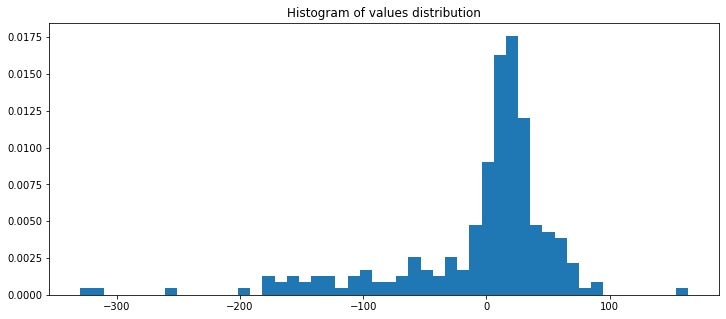

In [85]:
EDA(10, 50)

======= Analyzing feature "Ceremony Date" =======
count                     413
unique                     13
top       2012-02-26 00:00:00
freq                       37
first     2003-03-23 00:00:00
last      2015-02-22 00:00:00
Name: Ceremony Date, dtype: object


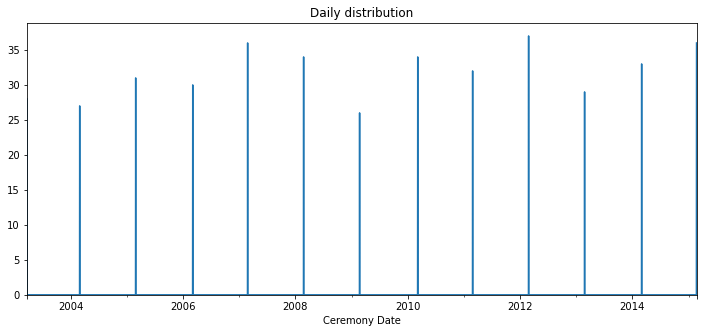

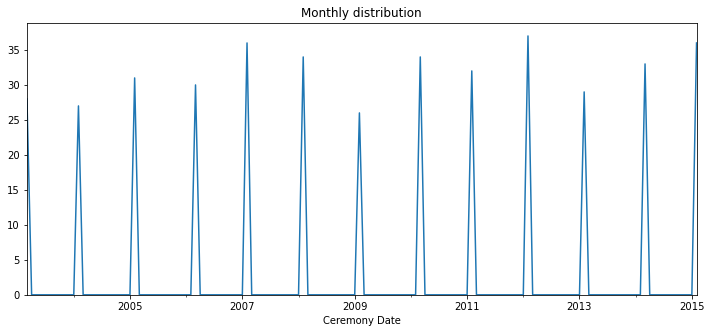

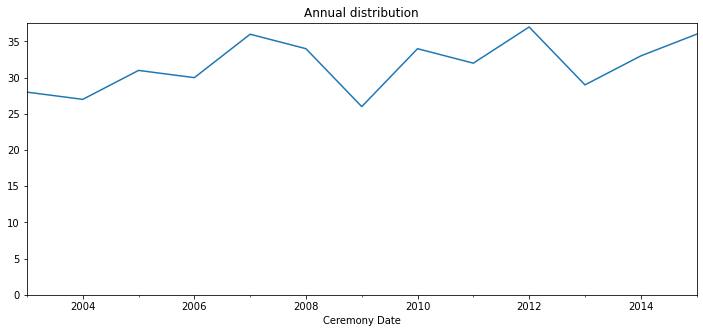

In [86]:
EDA(11)

======= Analyzing feature "Screener Leaked by Oscar Night?" =======
count    413.000000
mean       0.602906
std        0.489889
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: Screener Leaked by Oscar Night?, dtype: float64


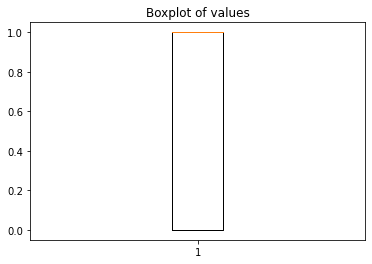

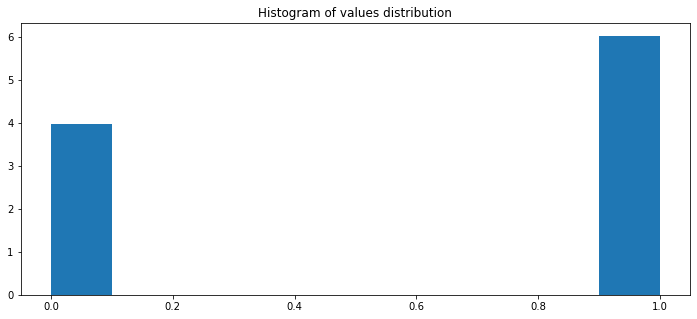

In [89]:
EDA(12)

======= Analyzing feature "Screener/Retail DVD Leaked by Oscar Night?" =======
count    413.000000
mean       0.922518
std        0.267679
min        0.000000
25%        1.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: Screener/Retail DVD Leaked by Oscar Night?, dtype: float64


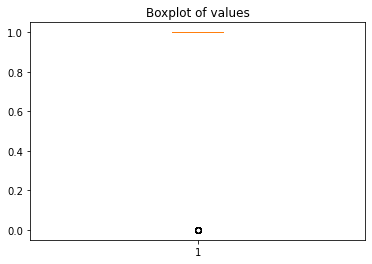

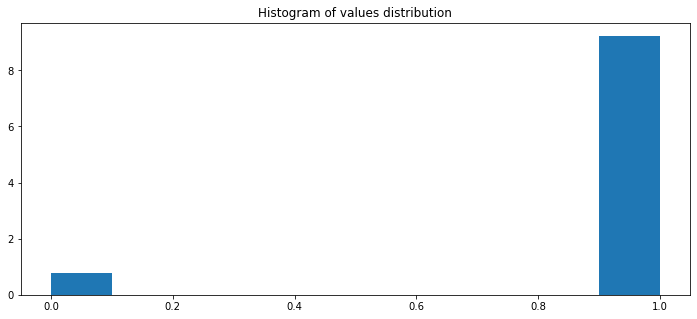

In [90]:
EDA(13)

======= Analyzing feature "High-Quality Leak by Oscar Night?" =======
count    413.000000
mean       0.934625
std        0.247487
min        0.000000
25%        1.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: High-Quality Leak by Oscar Night?, dtype: float64


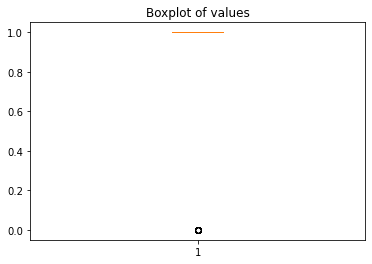

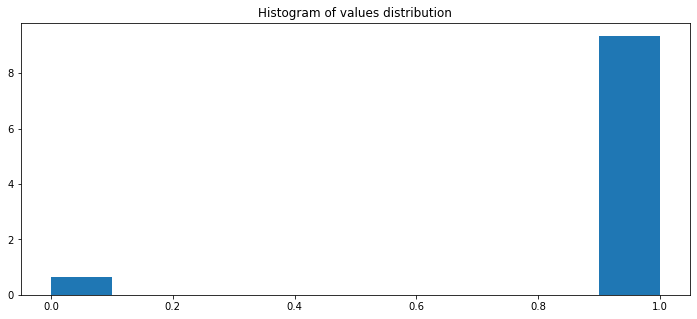

In [91]:
EDA(14)

======= Analyzing feature "US Release to DVD/Blu-Ray Leak" =======
count    389.000000
mean     104.408740
std       69.758715
min     -169.000000
25%       82.000000
50%      103.000000
75%      130.000000
max      976.000000
Name: US Release to DVD/Blu-Ray Leak, dtype: float64


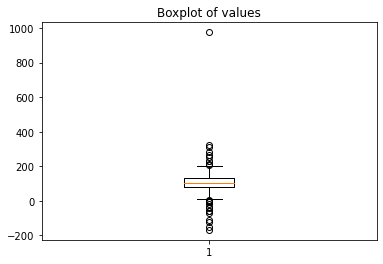

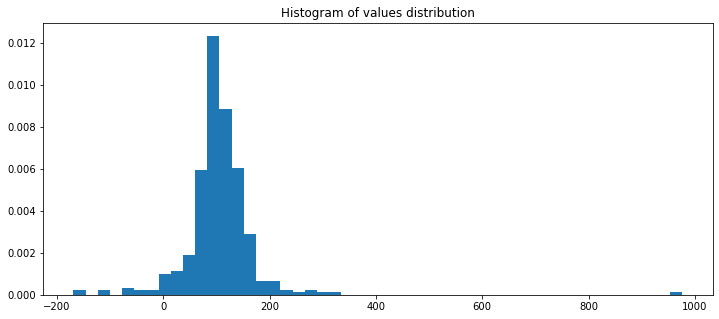

In [93]:
EDA(15, 50)

* Пик релизов приходится на конец каждого года
* Слив происходит как правило в первые дни после релиза
* Большинство фильмов оказываются слиты до дня вручения Оскара


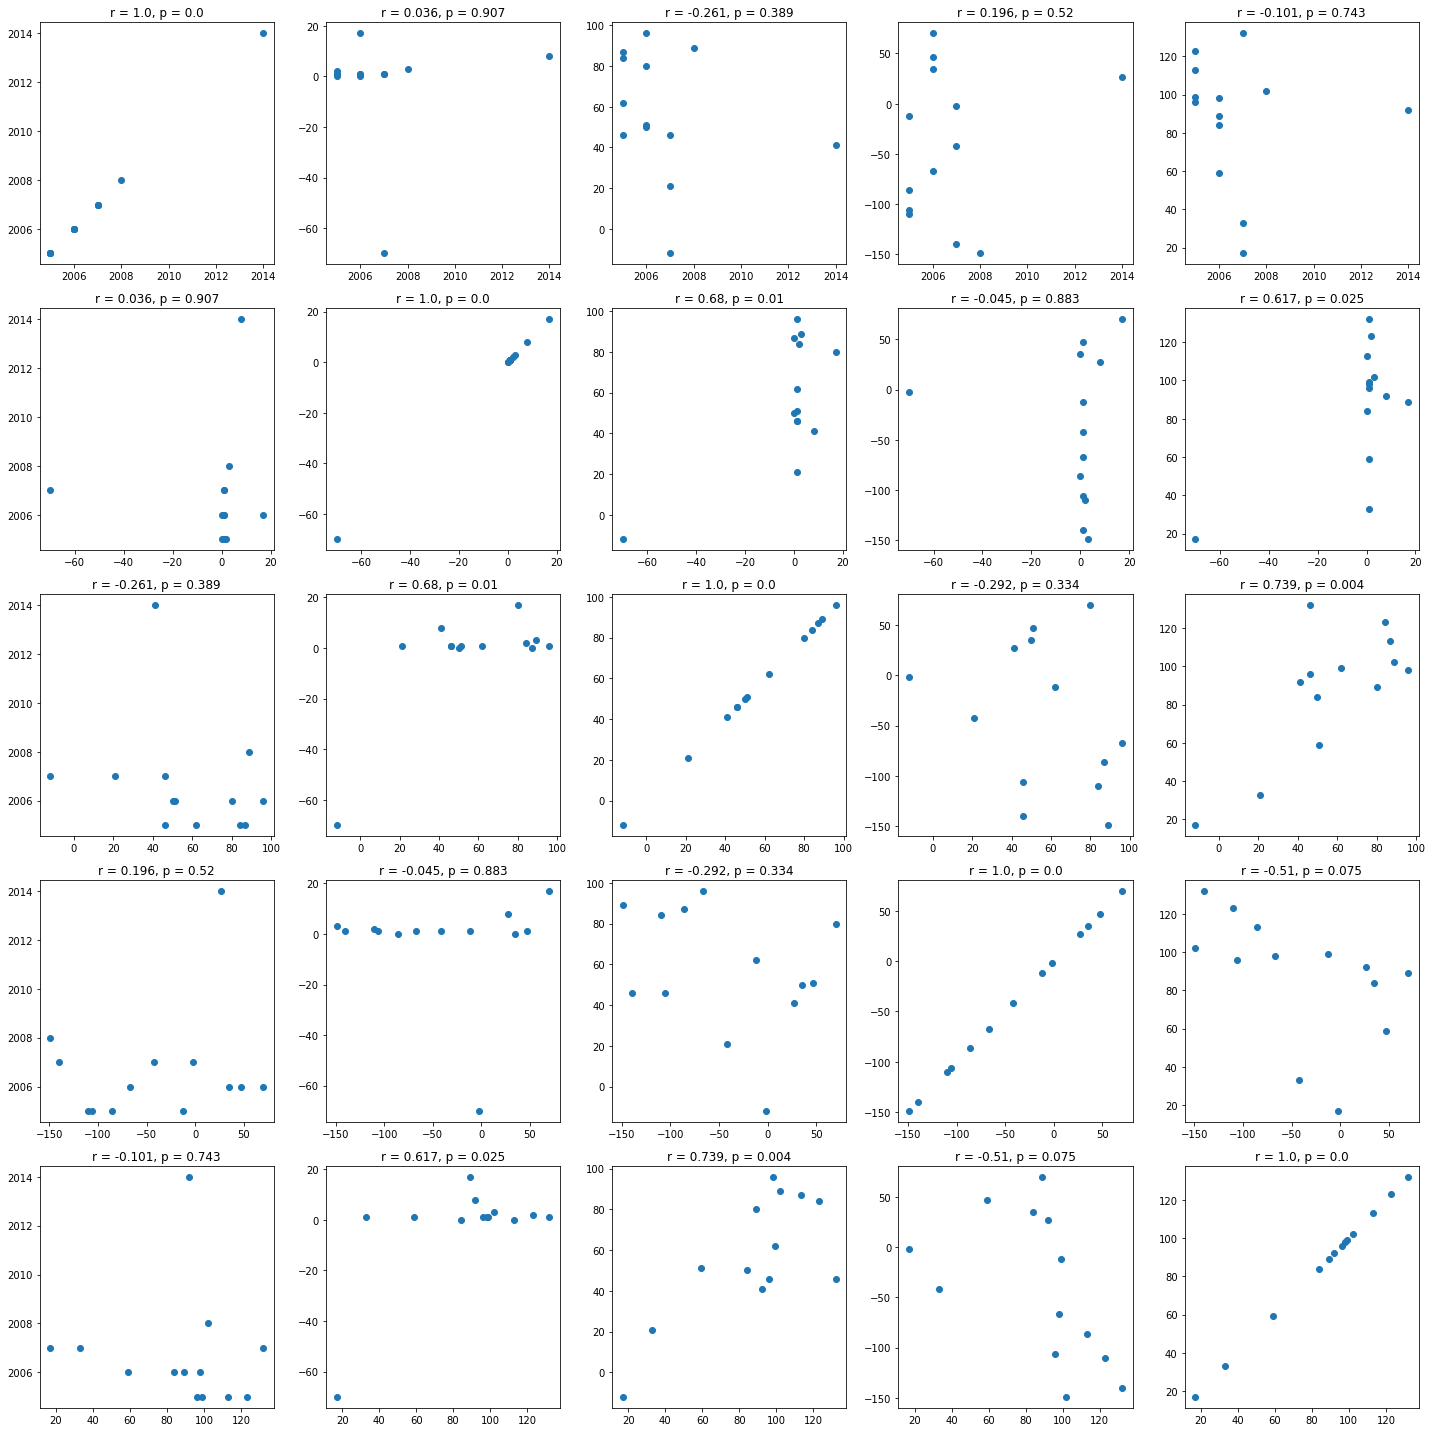

In [100]:
plt.figure(figsize=(20, 20))

xx = [0,8,9,10,15]

_data = data.dropna()

cnt = 1
for i in xx:
    for j in xx:
        plt.subplot(5, 5, cnt)
        cnt += 1
        plt.scatter(_data.iloc[:, i], _data.iloc[:, j])
        r, p = map(lambda x: round(x, 3), scipy.stats.pearsonr(_data.iloc[:, i], _data.iloc[:, j]))
        #plt.xlabel(data.columns[i])
        #plt.ylabel(data.columns[j])
        plt.tight_layout()
        plt.title(f'r = {r}, p = {p}')
plt.show()

"US Release to Screener Leak" и "US Release to DVD/Blu-Ray Leak" имеют линейную зависимость. r=0.739, p=0.004

##### Сгруппируем данные релизов и сливов по годам и проверим на независимость с помощью хи-квадрат

In [128]:
from scipy.stats import chi2_contingency as c2t

xx = [1,2,3,4,5,6,7,11]

for i in xx:
    for j in xx:
        if j>i:
            a = data.iloc[:, i]
            a = pd.Series([1]*len(a), index=a)
            a = a.resample('Y').sum()
            
            b = data.iloc[:, j]
            b = pd.Series([1]*len(b), index=b)
            b = b.resample('Y').sum()
            
            arr = pd.concat((a, b), axis=1).fillna(0).convert_dtypes('int64').values.T
            chi2, p, dof, _ = c2t(arr)
            
            if p < 0.01:
                print(f"Features '{data.columns[i]}' and '{data.columns[j]}' are dependent at level 0.01 with chi2={round(chi2, 2)} and p-value={round(p, 5)}")
            

Features 'US Release Date' and 'Cam Leak' are dependent at level 0.01 with chi2=27.43 and p-value=0.00671
Features 'US Release Date' and 'Screener Leak' are dependent at level 0.01 with chi2=40.95 and p-value=0.0001
Features 'US Release Date' and 'Ceremony Date' are dependent at level 0.01 with chi2=67.97 and p-value=0.0
Features 'Oscar Screener Release' and 'Screener Leak' are dependent at level 0.01 with chi2=37.74 and p-value=0.00032
Features 'Oscar Screener Release' and 'Ceremony Date' are dependent at level 0.01 with chi2=54.83 and p-value=0.0
Features 'Cam Leak' and 'Screener Leak' are dependent at level 0.01 with chi2=36.26 and p-value=0.00054
Features 'Cam Leak' and 'Retail Leak (DVD/Blu-Ray)' are dependent at level 0.01 with chi2=28.76 and p-value=0.00708
Features 'Cam Leak' and 'Ceremony Date' are dependent at level 0.01 with chi2=59.59 and p-value=0.0
Features 'Telesync Leak' and 'HQ Rip Leak (Telecine/R5/PPV/Webrip/WebDL/HDRip)' are dependent at level 0.01 with chi2=30.97 a